In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
#import psycopg2
from dbkeys import u_key
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [24]:
engine = create_engine(u_key)

In [3]:
conn = engine.connect()
conn

In [4]:
salaryA = pd.read_sql("SELECT * FROM salaries", conn)
salaryA.count()

emp_no    300024
salary    300024
dtype: int64

In [5]:
salaryA = salaryA.dropna(how='any')
salaryA.count()

emp_no    300024
salary    300024
dtype: int64

In [6]:
salaryA.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [7]:
salaryA["salary"].describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

In [8]:
step = round((max(salaryA["salary"])-min(salaryA["salary"]))/10)
bin_range = np.arange(min(salaryA["salary"]), max(salaryA["salary"])+ step, step)
salaryA["salary_range"] = pd.cut(salaryA["salary"], bin_range, include_lowest=True)
salaryA["salary_range"].value_counts()

(39999.999, 48949.0]    151743
(48949.0, 57898.0]       53779
(57898.0, 66847.0]       41098
(66847.0, 75796.0]       27313
(75796.0, 84745.0]       15565
(84745.0, 93694.0]        7209
(93694.0, 102643.0]       2487
(102643.0, 111592.0]       669
(111592.0, 120541.0]       143
(120541.0, 129490.0]        17
(129490.0, 138439.0]         1
Name: salary_range, dtype: int64

In [9]:
salaryA

,emp_no,salary,salary_range
0,10001,60117,"(57898.0, 66847.0]"
1,10002,65828,"(57898.0, 66847.0]"
2,10003,40006,"(39999.999, 48949.0]"
3,10004,40054,"(39999.999, 48949.0]"
4,10005,78228,"(75796.0, 84745.0]"
...,...,...,...
300019,499995,40000,"(39999.999, 48949.0]"
300020,499996,58058,"(57898.0, 66847.0]"
300021,499997,49597,"(48949.0, 57898.0]"
300022,499998,40000,"(39999.999, 48949.0]"


#### According to the provided data that covered the period from 1980s to 1990s, majority of the employees (>50%) are at the lowest salary range in the corporation. 

In [10]:
employees = pd.read_sql("SELECT * FROM employees", conn)
employees.count()

emp_no        300024
emp_title     300024
birth_date    300024
first_name    300024
last_name     300024
sex           300024
hire_date     300024
dtype: int64

In [11]:
employees = employees.dropna(how='any')
employees.count()

emp_no        300024
emp_title     300024
birth_date    300024
first_name    300024
last_name     300024
sex           300024
hire_date     300024
dtype: int64

In [12]:
employees.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [13]:
title = pd.read_sql("SELECT * FROM title", conn)
title.count()

title_id    7
title       7
dtype: int64

In [14]:
title = title.dropna(how='any')
title1=title.rename(columns={"title_id" : "emp_title"})
title1.count()

emp_title    7
title        7
dtype: int64

In [15]:
title1.head()

,emp_title,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [16]:
combined1=pd.merge(employees, salaryA, on="emp_no", how="inner")
combined1.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary,salary_range
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,"(39999.999, 48949.0]"
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422,"(48949.0, 57898.0]"
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973,"(48949.0, 57898.0]"
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,"(39999.999, 48949.0]"
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000,"(39999.999, 48949.0]"


In [17]:
combined2=pd.merge(combined1, title1, on="emp_title", how="inner")
combined2.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary,salary_range,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,"(39999.999, 48949.0]",Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,"(39999.999, 48949.0]",Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,"(48949.0, 57898.0]",Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,"(84745.0, 93694.0]",Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,"(57898.0, 66847.0]",Staff


In [18]:
print(min(combined2["hire_date"]), max(combined2["hire_date"]))

1985-01-01 2000-01-28


In [19]:
combined3 = combined2[["title", "salary"]]
combined = combined3.groupby(['title']).mean() 
combined = combined.sort_values('salary', ascending=False)
combined

,salary
title,
Senior Staff,58550.172704
Staff,58465.382850
Manager,51531.041667
Technique Leader,48582.896092
Assistant Engineer,48564.434447
Engineer,48535.336511
Senior Engineer,48506.799871


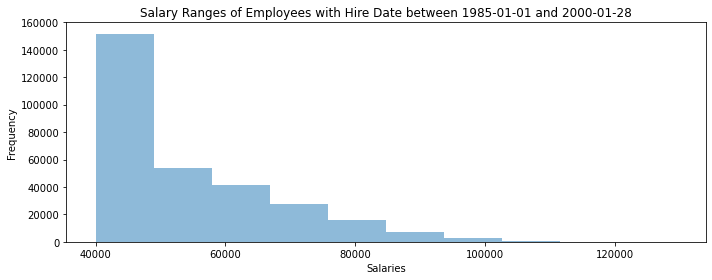

NormaltestResult(statistic=42673.14479918547, pvalue=0.0)


In [20]:
plt.figure(figsize=(10,4))
plt.hist(combined2["salary"], bins=10, alpha=0.5)
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.ylim(0, 160000)
plt.title("Salary Ranges of Employees with Hire Date between 1985-01-01 and 2000-01-28")
plt.tight_layout()
plt.show()
print(sts.normaltest(salaryA["salary"].sample(len(salaryA))))

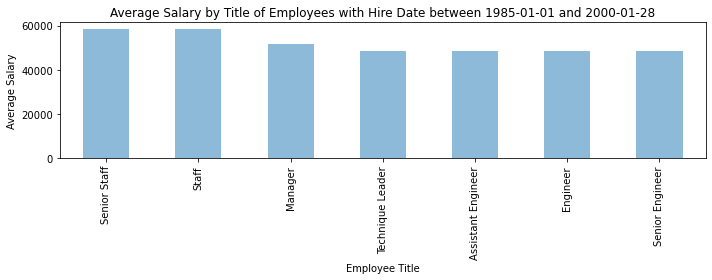

In [21]:
combined.plot(kind="bar", figsize=(10,4), xlabel = "Employee Title", ylabel="Average Salary", legend=False, alpha=0.5)
plt.title("Average Salary by Title of Employees with Hire Date between 1985-01-01 and 2000-01-28")
plt.tight_layout()
plt.show()

#### When this was further analyzed by employee title, the average salary of Senior Staff was almost the same as that of the Staff. Similar was observed among Technicque Leader, Assistant Engineer, Engineer and Senior Engineer. In addition, the average salary of Senior Engineer was below that of Engineer and both were lower than that of Assistant Engineer.